# CONTENT

Here some Exploratory Data Analysis is done on the data coming form spotfire and towards the end there is the script to build a distance matrix (that might be wrong because not gasssian score, just distance)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [ ]:
dataframe = pd.read_excel('/content/drive/MyDrive/spotfire_export_08_07 - Kopie.xlsx')

In [ ]:
dataframe

,ELN_ID,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,Link to Presentation,Link to Cheatsheets,"Acids, all Component",Additives Component,...,Softmax ELN,Softmax Plate,Softmax Reaction Type,Softmax All,Yield Normalized ELN Top 3,Weight on norm yield average,z-Score ELN Area Total Reduced,Vials on Plate,Ratio of Base Hits,inputRowIndex
0,ELN031853-003,C1,1,C,1,Heck,https://docs.google.com/presentation/d/1V47GPK...,https://docs.google.com/spreadsheets/d/1uQv1WZ...,NaN,KOPiv,...,0.002079,0.010726,0.000802,0.000019,NaN,-0.212943,-0.050408,96,NaN,1
1,ELN031853-003,D1,1,D,1,Heck,https://docs.google.com/presentation/d/1V47GPK...,https://docs.google.com/spreadsheets/d/1uQv1WZ...,NaN,KOPiv,...,0.002156,0.010823,0.000810,0.000019,NaN,-0.194859,0.139754,96,NaN,2
2,ELN031853-003,A1,1,A,1,Heck,https://docs.google.com/presentation/d/1V47GPK...,https://docs.google.com/spreadsheets/d/1uQv1WZ...,NaN,KOPiv,...,0.002594,0.011329,0.000847,0.000021,0.260119,-0.102454,0.485893,96,NaN,3
3,ELN031853-003,H5,1,H,5,Heck,https://docs.google.com/presentation/d/1V47GPK...,https://docs.google.com/spreadsheets/d/1uQv1WZ...,NaN,KOPiv,...,0.001822,0.010381,0.000776,0.000018,NaN,-0.045768,-0.371923,96,NaN,4
4,ELN031853-003,D7,1,D,7,Heck,https://docs.google.com/presentation/d/1V47GPK...,https://docs.google.com/spreadsheets/d/1uQv1WZ...,NaN,KOPiv,...,0.001711,0.010221,0.000765,0.000017,NaN,-0.194237,-0.634724,96,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51030,ELN032036-400,F6,1,F,6,CN-Coupling,https://docs.google.com/open?id=13JhEjd1d5IBAF...,https://docs.google.com/spreadsheets/d/155gP9z...,NaN,NaN,...,0.006773,0.010311,0.000578,0.000016,NaN,-0.314427,-0.461211,96,NaN,51031
51031,ELN032036-244,C2,4,C,2,Heck,https://docs.google.com/open?id=19ni8O0JODQ0VR...,https://docs.google.com/spreadsheets/d/18AUKVC...,NaN,TBAC,...,0.001879,0.009918,0.000745,0.000016,NaN,-0.694156,-0.761757,96,NaN,51032
51032,ELN032036-257,E2,1,E,2,Buchwald-Hartwig,https://docs.google.com/open?id=1VuQCpUXMBm7R5...,https://docs.google.com/spreadsheets/d/1ymDujo...,NaN,NaN,...,0.002618,0.009448,0.000054,0.000016,NaN,-0.426609,-1.016472,96,NaN,51033
51033,ELN032036-470,G1,2,G,1,Cyclization,https://docs.google.com/open?id=1l0rRVUOmjuWED...,https://docs.google.com/spreadsheets/d/1rVMyCZ...,NaN,TBAC,...,0.001967,0.009940,0.000750,0.000016,NaN,-0.260293,-1.042555,96,NaN,51034


In [ ]:
dataframe['AREA_TOTAL_REDUCED']

0        31.415240
1        37.300550
2        48.013167
3        21.464715
4        13.331318
           ...    
51030     0.000000
51031     0.000000
51032     0.000000
51033     0.000000
51034     0.000000
Name: AREA_TOTAL_REDUCED, Length: 51035, dtype: float64

In [ ]:
Suzuki = dataframe[(dataframe['Reaction Type'] == "Suzuki-Miyaura") & (dataframe["PLATENUMBER"] == 1)]
Buchwald = dataframe[(dataframe['Reaction Type'] == "Buchwald-Hartwig") & (dataframe["PLATENUMBER"] == 1)]

In [ ]:
Buchwald

,ELN_ID,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,Link to Presentation,Link to Cheatsheets,"Acids, all Component",Additives Component,...,Softmax ELN,Softmax Plate,Softmax Reaction Type,Softmax All,Yield Normalized ELN Top 3,Weight on norm yield average,z-Score ELN Area Total Reduced,Vials on Plate,Ratio of Base Hits,inputRowIndex
362,ELN032036-005,A1,1,A,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007589,NaN,NaN,0.000016,0.008240,-0.165903,-0.504808,96,NaN,363
363,ELN032036-005,D1,1,D,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007583,NaN,NaN,0.000016,NaN,-0.166299,-0.496313,96,NaN,364
364,ELN032036-005,F1,1,F,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007576,NaN,NaN,0.000016,NaN,-0.166736,-0.492585,96,NaN,365
365,ELN032036-005,G1,1,G,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007512,NaN,NaN,0.000016,NaN,-0.170984,-0.550941,96,NaN,366
373,ELN032036-005,B6,1,B,6,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.021150,NaN,NaN,0.000027,0.520727,0.154461,2.143743,96,NaN,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51023,ELN032036-444,C7,1,C,7,Buchwald-Hartwig,https://docs.google.com/open?id=1RA9-oC6D58d1Z...,https://docs.google.com/spreadsheets/d/1hud5_Q...,NaN,NaN,...,0.008821,0.010389,0.000054,0.000016,NaN,-0.303136,-0.314686,96,NaN,51024
51024,ELN032036-433,G9,1,G,9,Buchwald-Hartwig,https://docs.google.com/open?id=14Ai4qAxgBVN6-...,https://docs.google.com/spreadsheets/d/1f1mned...,NaN,NaN,...,0.009447,0.010392,0.000054,0.000016,NaN,-0.174373,-0.269144,96,NaN,51025
51029,ELN032036-320,C5,1,C,5,Buchwald-Hartwig,https://docs.google.com/open?id=1464D--plvz0fE...,https://docs.google.com/spreadsheets/d/1E62RIy...,NaN,NaN,...,0.010771,0.037871,0.000054,0.000016,NaN,-0.298638,-0.880013,24,NaN,51030
51032,ELN032036-257,E2,1,E,2,Buchwald-Hartwig,https://docs.google.com/open?id=1VuQCpUXMBm7R5...,https://docs.google.com/spreadsheets/d/1ymDujo...,NaN,NaN,...,0.002618,0.009448,0.000054,0.000016,NaN,-0.426609,-1.016472,96,NaN,51033


In [ ]:
experiments = Buchwald['ELN_ID'].unique()

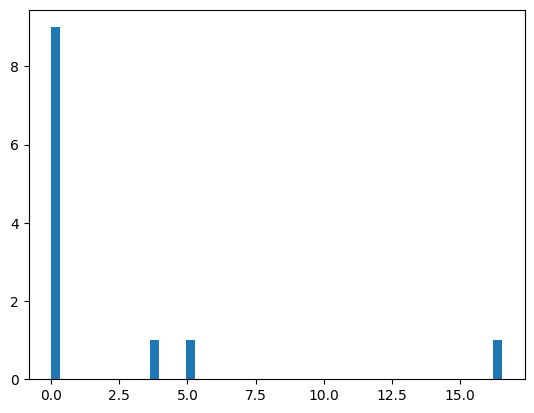

In [ ]:
plt.hist(Buchwald[(Buchwald['ELN_ID'] == experiments[0]) & (Buchwald['PlateRow'] == "E")]['AREA_TOTAL_REDUCED'], bins=50)
plt.show()

In [ ]:
my_plate = Buchwald[Buchwald['ELN_ID'] == experiments[0]]

In [ ]:
my_plate.loc[:,'AREA_TOTAL_REDUCED'] = my_plate['AREA_TOTAL_REDUCED'].clip(0,100)

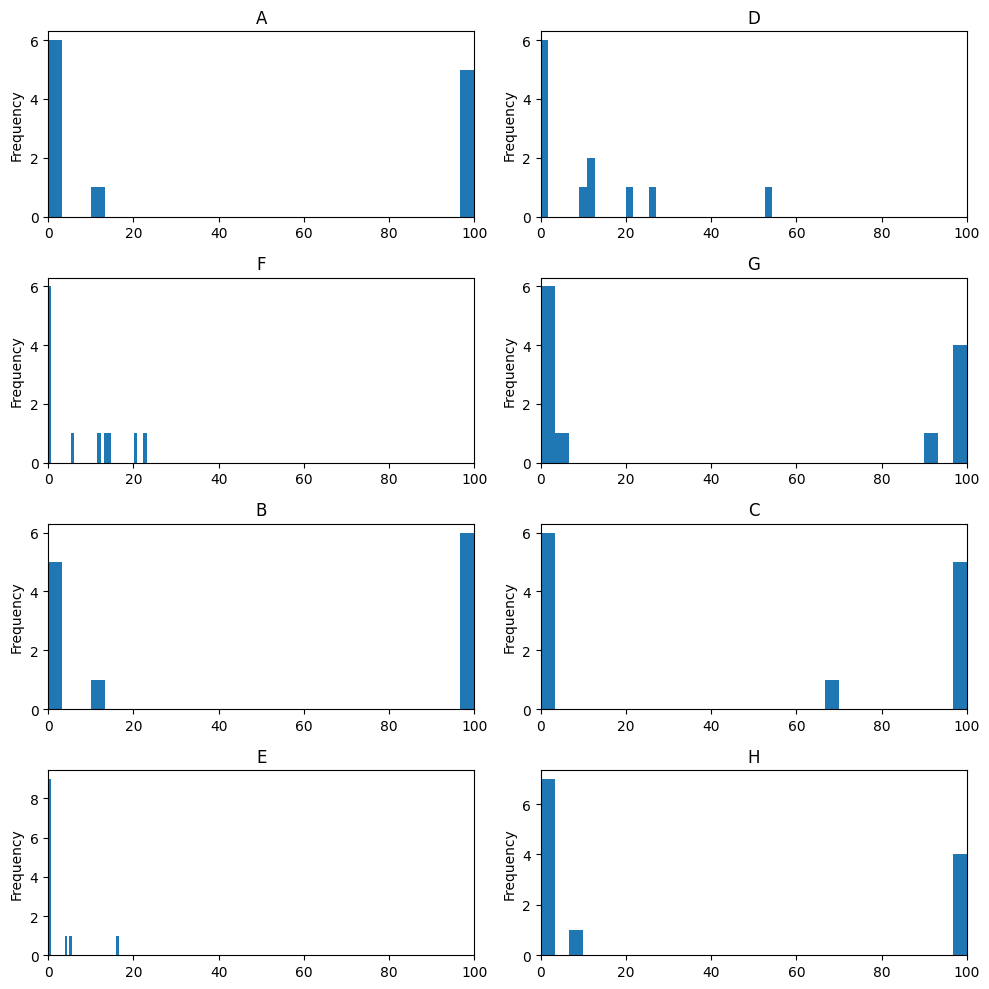

In [ ]:
#Create subplots for PlateRow from A to H

fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    if i < len(my_plate['PlateRow'].unique()):
        my_plate[my_plate['PlateRow'] == my_plate['PlateRow'].unique()[i]]['AREA_TOTAL_REDUCED'].plot.hist(bins=30, ax=ax)
        #set x axis from 0 to 100
        ax.set_xlim(0, 100)
        ax.set_title(my_plate['PlateRow'].unique()[i])

plt.tight_layout()

plt.show()

In [ ]:
[sum((my_plate['AREA_TOTAL_REDUCED'] >= 20) & (my_plate['PlateRow'] == element)) for element in my_plate['PlateRow'].unique()]

[5, 3, 2, 5, 6, 6, 0, 4]

In [ ]:
[sum((my_plate['AREA_TOTAL_REDUCED'] < 20) & (my_plate['AREA_TOTAL_REDUCED'] != 0) & (my_plate['PlateRow'] == element)) for element in my_plate['PlateRow'].unique()]

[2, 3, 4, 1, 1, 0, 3, 1]

-----

In [ ]:
Buchwald[Buchwald['Vials on Plate'] == 96]

,ELN_ID,Coordinate,PLATENUMBER,PlateRow,PlateColumn,Reaction Type,Link to Presentation,Link to Cheatsheets,"Acids, all Component",Additives Component,...,Softmax ELN,Softmax Plate,Softmax Reaction Type,Softmax All,Yield Normalized ELN Top 3,Weight on norm yield average,z-Score ELN Area Total Reduced,Vials on Plate,Ratio of Base Hits,inputRowIndex
362,ELN032036-005,A1,1,A,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007589,NaN,NaN,0.000016,0.008240,-0.165903,-0.504808,96,NaN,363
363,ELN032036-005,D1,1,D,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007583,NaN,NaN,0.000016,NaN,-0.166299,-0.496313,96,NaN,364
364,ELN032036-005,F1,1,F,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007576,NaN,NaN,0.000016,NaN,-0.166736,-0.492585,96,NaN,365
365,ELN032036-005,G1,1,G,1,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.007512,NaN,NaN,0.000016,NaN,-0.170984,-0.550941,96,NaN,366
373,ELN032036-005,B6,1,B,6,Buchwald-Hartwig,no presentation exists,https://docs.google.com/spreadsheets/d/1D2cL5j...,NaN,NaN,...,0.021150,NaN,NaN,0.000027,0.520727,0.154461,2.143743,96,NaN,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51019,ELN032036-083,B12,1,B,12,Buchwald-Hartwig,https://docs.google.com/presentation/d/1h8b3eK...,https://docs.google.com/spreadsheets/d/1C9-lij...,NaN,NaN,...,0.007176,0.010395,0.000054,0.000016,NaN,-0.282798,-0.506574,96,NaN,51020
51023,ELN032036-444,C7,1,C,7,Buchwald-Hartwig,https://docs.google.com/open?id=1RA9-oC6D58d1Z...,https://docs.google.com/spreadsheets/d/1hud5_Q...,NaN,NaN,...,0.008821,0.010389,0.000054,0.000016,NaN,-0.303136,-0.314686,96,NaN,51024
51024,ELN032036-433,G9,1,G,9,Buchwald-Hartwig,https://docs.google.com/open?id=14Ai4qAxgBVN6-...,https://docs.google.com/spreadsheets/d/1f1mned...,NaN,NaN,...,0.009447,0.010392,0.000054,0.000016,NaN,-0.174373,-0.269144,96,NaN,51025
51032,ELN032036-257,E2,1,E,2,Buchwald-Hartwig,https://docs.google.com/open?id=1VuQCpUXMBm7R5...,https://docs.google.com/spreadsheets/d/1ymDujo...,NaN,NaN,...,0.002618,0.009448,0.000054,0.000016,NaN,-0.426609,-1.016472,96,NaN,51033


In [ ]:
Buchwald["Vials on Plate"].value_counts()

Vials on Plate
96    8352
24     816
72     144
5        5
2        4
Name: count, dtype: int64

In [ ]:
Buchwald.loc[:,'AREA_TOTAL_REDUCED'] = Buchwald['AREA_TOTAL_REDUCED'].clip(0,100)

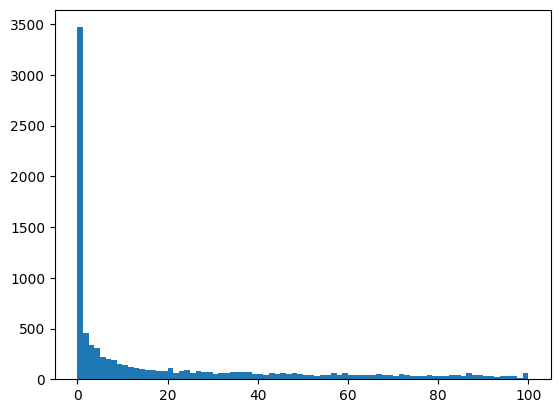

In [ ]:
plt.hist(Buchwald['AREA_TOTAL_REDUCED'], bins = 80)
plt.show()

In [ ]:
experiments = Buchwald['ELN_ID'].unique()

In [ ]:
#Take jsut the 96 vials plates (that are still enough for a good estimate)
plates_list =  [Buchwald[(Buchwald['ELN_ID'] == experiment) & (Buchwald['Vials on Plate'] == 96)] for experiment in experiments ]


In [ ]:
fake_hitters = [sum((plate['AREA_TOTAL_REDUCED'] < 60) & (plate['AREA_TOTAL_REDUCED'] >= 10) & (plate['PlateRow'] == element)) for plate in plates_list for element in plate['PlateRow'].unique()]

In [ ]:
## Without zeros
lista =  [list(plate[(plate['AREA_TOTAL_REDUCED'] < 60) & (plate['AREA_TOTAL_REDUCED'] >= 10) & (plate['PlateRow'] == element)]['AREA_TOTAL_REDUCED']) for plate in plates_list for element in plate['PlateRow'].unique()]

# ## With zeros
# lista =  [list(plate[(plate['AREA_TOTAL_REDUCED'] < 20) & (plate['PlateRow'] == element)]['AREA_TOTAL_REDUCED']) for plate in plates_list for element in plate['PlateRow'].unique()]

lista

[[11.4729824187602],
 [12.6514680683273,
  11.8927318226951,
  21.508703820702,
  26.1002543442114,
  54.364944720762],
 [13.1687244355729,
  13.9447015713159,
  20.7053469155237,
  23.1186613642763,
  11.9208178969795],
 [],
 [12.6264665347732],
 [],
 [16.545012485734],
 [],
 [42.150038950133],
 [59.7174976270087, 18.7714484687095, 18.019483464716, 40.8132928395704],
 [21.8493301903552,
  10.4446240877993,
  42.8229307152181,
  11.5534740356193,
  18.6597941618364,
  31.9341727707129,
  22.8291305668768,
  10.6027481945325,
  25.0000015166577],
 [38.3978241488368,
  16.6457928707907,
  44.6285148141891,
  27.6377950643006,
  11.9438600353066],
 [17.3380025885603, 13.1594809280301, 26.8775377097097],
 [56.9488692058902, 10.6382973596704, 26.442687960744, 46.8852511044319],
 [],
 [],
 [11.6561357201884,
  19.4111218559079,
  26.3599636314208,
  33.9343483467988,
  37.4381523988854,
  29.5020589292999,
  13.7714900288371,
  18.4423216519661,
  11.9565220988211,
  52.5520357817202],
 [50.

mean yeald value 11.566012730890085
median yeald value 2.94784579885905


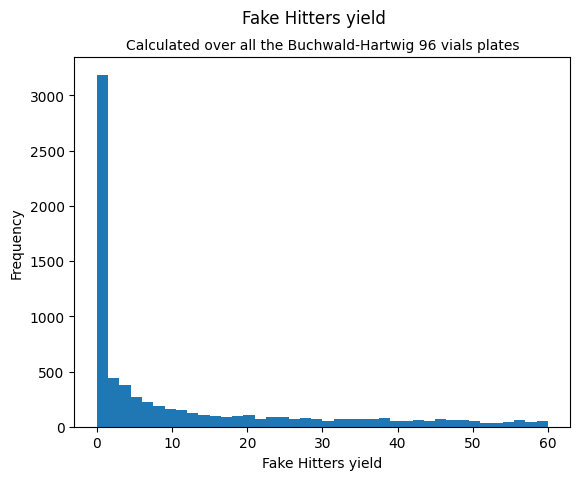

In [ ]:
lista_to_test = [element[i] for element in lista for i in range(len(element))]
print("mean yeald value", np.mean(lista_to_test))
print("median yeald value", np.median(lista_to_test))
plt.hist(lista_to_test, bins = 40)
plt.suptitle('Fake Hitters yield')
plt.title('Calculated over all the Buchwald-Hartwig 96 vials plates', fontdict={'size': 10})
plt.xlabel('Fake Hitters yield')
plt.ylabel('Frequency')
plt.show()

We want to test if the values of yeald of these fake hitters (yealds != 0 and <20) are distributed according to an exponential distribution

In [ ]:
#find the scale of the exponential distribution
scale = 1 / np.mean(lista_to_test)
scale


0.16342603957374913

In [ ]:
from scipy import stats
stats.kstest(lista_to_test, 'expon', args=(scale,), alternative='less')

KstestResult(statistic=0.5540536655866073, pvalue=0.0, statistic_location=2.98406236785041, statistic_sign=-1)

-------

In [ ]:
## With zeros and all the values
lista =  [list(plate[(plate['AREA_TOTAL_REDUCED'] < 60) & (plate['PlateRow'] == element)]['AREA_TOTAL_REDUCED']) for plate in plates_list for element in plate['PlateRow'].unique()]

In [ ]:
mean, median = np.mean(fake_hitters), np.median(fake_hitters)
print(f"Mean: {mean}, Median: {median}")

Mean: 3.5129310344827585, Median: 3.0


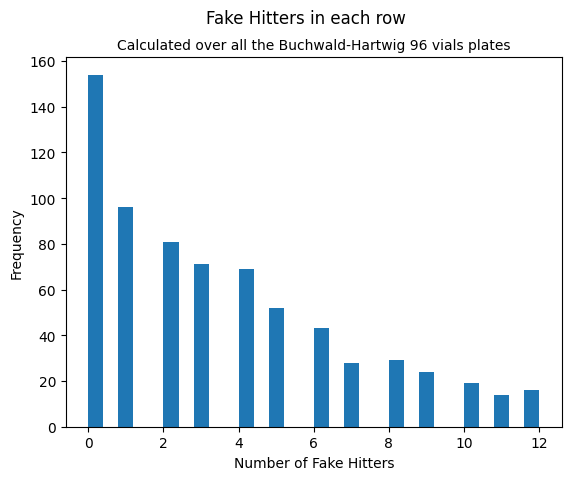

In [ ]:
plt.hist(fake_hitters, bins=30)
plt.suptitle('Fake Hitters in each row')
plt.title('Calculated over all the Buchwald-Hartwig 96 vials plates', fontdict={'size': 10})
plt.xlabel('Number of Fake Hitters')
plt.ylabel('Frequency')
plt.show()

-----

Mean: 4.055851063829787, Median: 3.0


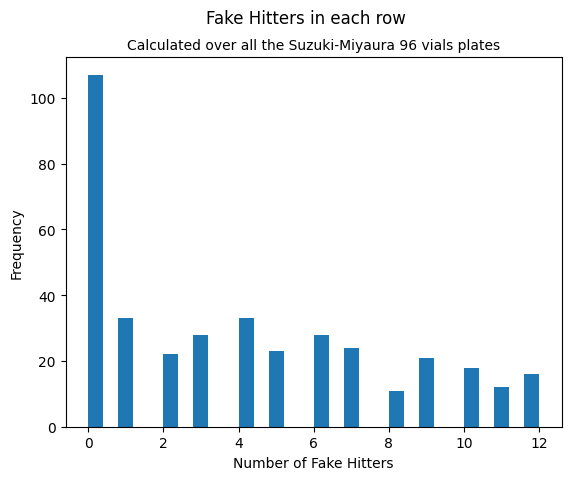

In [ ]:
Suzuki.loc[:,'AREA_TOTAL_REDUCED'] = Suzuki['AREA_TOTAL_REDUCED'].clip(0,100)

experiments_2 = Suzuki['ELN_ID'].unique()

#Take jsut the 96 vials plates (that are still enough for a good estimate)
plates_list_2 =  [Suzuki[(Suzuki['ELN_ID'] == experiment) & (Suzuki['Vials on Plate'] == 96)] for experiment in experiments_2 ]

fake_hitters_2 = [sum((plate['AREA_TOTAL_REDUCED'] < 20) & (plate['AREA_TOTAL_REDUCED'] != 0) & (plate['PlateRow'] == element)) for plate in plates_list_2 for element in plate['PlateRow'].unique()]

mean, median = np.mean(fake_hitters_2), np.median(fake_hitters_2)
print(f"Mean: {mean}, Median: {median}")

plt.hist(fake_hitters_2, bins=30)
plt.suptitle('Fake Hitters in each row')
plt.title('Calculated over all the Suzuki-Miyaura 96 vials plates', fontdict={'size': 10})
plt.xlabel('Number of Fake Hitters')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plates_list_2 =  [Suzuki[(Suzuki['ELN_ID'] == experiment) & (Suzuki['Vials on Plate'] == 96)] for experiment in experiments_2 ]

In [ ]:
 ## Without zeros
lista_2 =  [list(plate[(plate['AREA_TOTAL_REDUCED'] < 20) & (plate['AREA_TOTAL_REDUCED'] != 0) & (plate['PlateRow'] == element)]['AREA_TOTAL_REDUCED']) for plate in plates_list_2 for element in plate['PlateRow'].unique()]

lista_2

[[0.244527241313193, 12.7885501844414],
 [17.9746049758155],
 [],
 [7.34999990463257],
 [6.34999990463257],
 [1.70421389394363,
  11.6335776668409,
  2.03999996185303,
  9.19248941044623,
  10.2480342481814,
  10.5759164313669,
  8.87032174317137],
 [],
 [8.38489451964923],
 [2.55813939857085, 5.72057206081252, 1.0307311085107, 2.43283269986132],
 [2.53640214362602,
  5.52565471179274,
  1.01471338118559,
  10.3112837372878,
  1.98639467415825],
 [12.1333363829725,
  5.62429802778585,
  3.25369726934047,
  0.636604738365144,
  5.30697225794918],
 [6.60130668488018, 0.577867661748131, 2.59388297738704],
 [7.13043708566984, 1.40815027640736, 9.09090770547073],
 [8.33147224692299, 1.19715670374342, 1.12219445204493, 0.945110785290699],
 [2.10556682280665, 1.07263827424794, 10.8005084162668, 2.39550237772851],
 [2.3249054667957,
  4.74576249634479,
  1.90257500358429,
  0.950899049913506,
  9.95110780096846],
 [],
 [],
 [],
 [],
 [16.8896683121157],
 [],
 [19.0885080891761, 19.274345815466

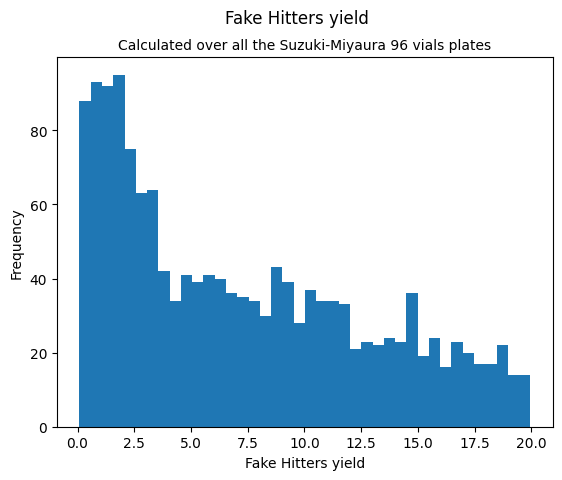

In [ ]:
lista_to_test_2 = [element[i] for element in lista_2 for i in range(len(element))]
plt.hist(lista_to_test_2, bins = 40)
plt.suptitle('Fake Hitters yield')
plt.title('Calculated over all the Suzuki-Miyaura 96 vials plates', fontdict={'size': 10})
plt.xlabel('Fake Hitters yield')
plt.ylabel('Frequency')
plt.show()

-------
## Generation of the empirical distance matrix

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Catalysts_coordinates.txt", header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Catalysts_coordinates.txt'

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
names = ['meCgPPh', 'RuPhos', 'VPhos', 'IPENT Cl', 'DiMel-HeptCl','Piperidinyl-amino-pincer', 'cPhos', 'SPhos', 'Jackie Phos' , 'GPhos', 'IPENT', 'IHept', 'N-XantPhos', 'TrixiePhos', 'CyJohnPhos', 'BrettPhos', 'EPhos', 'SIPr', 'Triisobutyl-Phosphatrane', 'PPh_3', 'DPEPhos', 'XantPhos', 'BINAP', 'XPhos', 'RockPhos', 'tBuBrettPhos', 'AlPhos', 'Amphos', 'P(tBu)_2Ph', 'P(oTol)_3', 'dppp', 'dppf', 'dtbpf', 'tBuXPhos', 'Me4tBuX-Phos', 'Me3(OMe)-tBuXPhos', 'AdBrettPhos', 'Mordal-Phos', 'P(tBu)_3', 'cataCXlum A', 'tBu-Phosphonito', 'dppdtbpf', 'dcypf', 'JosiPhosSL J009-1', 'QPhos', 'BippyPhos', 'AdBippyPhos', 'PCy_3', 'PtBu(Cy)_2', 'cBridP' ]

In [ ]:
df.index = names
df.columns = ['x', 'y']

NameError: name 'df' is not defined

In [ ]:
# prompt: create a distance matrix between all points in df from the coordinates

from scipy.spatial.distance import cdist
dist_mat = cdist(df, df)
dist_mat = pd.DataFrame(dist_mat, index=df.index, columns=df.index)



In [ ]:
#Save the distance matrix as .csv file

dist_mat.to_csv('distance_matrix.csv')

In [ ]:
df.to_csv('coordinates.csv')

-------

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/catalysts_coordinates_complete.csv", index_col=0)

In [ ]:
df.index = names
df


,x,y
meCgPPh,520,88
RuPhos,628,90
VPhos,753,90
IPENT Cl,1305,117
DiMel-HeptCl,1423,127
Piperidinyl-amino-pincer,402,186
cPhos,586,193
SPhos,694,196
Jackie Phos,836,191
GPhos,974,208


In [ ]:
# prompt: define two other rows indixed by 'CPhos' and 'Jackie CPhos' with x values respectively 580 and 720 and y values 196 and 194

df.loc['CPhos'] = [580, 196]
df.loc['Jackie CPhos'] = [720, 194]
df


,x,y
meCgPPh,520,88
RuPhos,628,90
VPhos,753,90
IPENT Cl,1305,117
DiMel-HeptCl,1423,127
Piperidinyl-amino-pincer,402,186
cPhos,586,193
SPhos,694,196
Jackie Phos,836,191
GPhos,974,208


In [ ]:
df.shape

(52, 2)

In [ ]:
names_2 = ['meCgPPh', 'TrixiePhos','IPENT Cl','RuPhos', 'RockPhos','VPhos', 'PPh_3',  'tBuBrettPhos', 'SIPr','CPhos',  'DPEPhos',  'AlPhos','Triisobutyl-Phosphatrane','SPhos', 'XantPhos','Me3(OMe)-tBuXPhos','Amphos','Jackie CPhos' ,  'dppp', 'Mordal-Phos', 'Jackie Phos', 'dppf','P(tBu)_3','GPhos',    'BINAP','BippyPhos','cataCXlum A', 'dppdtbpf','QPhos', 'cBridP', 'dtbpf','JosiPhosSL J009-1','PCy_3', 'XPhos','tBuXPhos' ]

In [ ]:
small_df = df.loc[names_2]

In [ ]:
from scipy.spatial.distance import cdist

dist_mat_2 = cdist(small_df, small_df)
dist_mat_2 = pd.DataFrame(dist_mat_2, index=small_df.index, columns=small_df.index)
dist_mat_2

,meCgPPh,TrixiePhos,IPENT Cl,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,SIPr,CPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
meCgPPh,0.000000,231.624696,785.535486,108.018517,374.509012,233.008584,421.283752,449.799956,814.324874,123.547562,...,575.003478,885.416286,516.860716,548.760421,891.650156,450.124427,537.023277,728.434623,339.560009,434.234959
TrixiePhos,231.624696,0.000000,794.120898,246.418343,202.684484,314.796760,397.555028,317.505905,758.238089,130.299655,...,364.671085,771.621669,322.342985,320.705472,749.112809,231.624696,306.235204,555.000000,122.918672,202.805325
IPENT Cl,785.535486,794.120898,0.000000,677.538191,650.711149,552.659932,1173.549317,540.934377,221.226129,729.291437,...,745.673521,441.311681,1070.082707,842.406078,552.313317,953.994759,930.840480,625.460630,751.205032,843.498666
RuPhos,108.018517,246.418343,677.538191,0.000000,327.482824,125.000000,519.665277,377.830650,711.612957,116.361506,...,538.988868,794.693652,562.694411,535.023364,810.355478,478.004184,544.824742,663.666332,324.260698,434.736702
RockPhos,374.509012,202.684484,650.711149,327.482824,0.000000,315.626361,593.414695,123.065023,577.781966,251.286689,...,212.983567,570.884402,419.659386,237.876018,546.648882,303.329853,295.392959,359.310451,106.470653,195.205020
VPhos,233.008584,314.796760,552.659932,125.000000,315.626361,0.000000,638.104223,323.080485,596.043623,202.891597,...,525.008571,697.433151,636.592491,548.292805,726.843174,538.157040,581.557392,606.488252,352.164734,469.703098
PPh_3,421.283752,397.555028,1173.549317,519.665277,593.414695,638.104223,0.000000,713.218059,1154.774870,444.890998,...,697.097554,1163.928692,354.746388,603.557785,1129.973451,398.722961,519.509384,920.220082,493.283894,488.466990
tBuBrettPhos,449.799956,317.505905,540.934377,377.830650,123.065023,323.080485,713.218059,0.000000,455.241694,333.634531,...,234.650804,454.948349,536.008395,308.457452,444.072066,419.318495,390.366494,286.832704,229.427548,304.630924
SIPr,814.324874,758.238089,221.226129,711.612957,577.781966,596.043623,1154.774870,455.241694,0.000000,728.964334,...,611.354234,220.311144,986.899184,721.535169,334.611715,870.882885,821.747528,444.063059,684.233878,753.316003
CPhos,123.547562,130.299655,729.291437,116.361506,251.286689,202.891597,444.890998,333.634531,728.964334,0.000000,...,452.173639,779.616572,447.393563,432.261495,777.606584,361.734709,432.511272,607.237186,220.791757,324.394821


In [ ]:
dist_mat_2

,meCgPPh,TrixiePhos,IPENT Cl,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,SIPr,CPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
meCgPPh,0.0,231.624696,785.535486,108.018517,374.509012,233.008584,421.283752,449.799956,814.324874,123.547562,...,575.003478,885.416286,516.860716,548.760421,891.650156,450.124427,537.023277,728.434623,339.560009,434.234959
TrixiePhos,0.0,0.000000,794.120898,246.418343,202.684484,314.796760,397.555028,317.505905,758.238089,130.299655,...,364.671085,771.621669,322.342985,320.705472,749.112809,231.624696,306.235204,555.000000,122.918672,202.805325
IPENT Cl,0.0,0.000000,0.000000,677.538191,650.711149,552.659932,1173.549317,540.934377,221.226129,729.291437,...,745.673521,441.311681,1070.082707,842.406078,552.313317,953.994759,930.840480,625.460630,751.205032,843.498666
RuPhos,0.0,0.000000,0.000000,0.000000,327.482824,125.000000,519.665277,377.830650,711.612957,116.361506,...,538.988868,794.693652,562.694411,535.023364,810.355478,478.004184,544.824742,663.666332,324.260698,434.736702
RockPhos,0.0,0.000000,0.000000,0.000000,0.000000,315.626361,593.414695,123.065023,577.781966,251.286689,...,212.983567,570.884402,419.659386,237.876018,546.648882,303.329853,295.392959,359.310451,106.470653,195.205020
VPhos,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,638.104223,323.080485,596.043623,202.891597,...,525.008571,697.433151,636.592491,548.292805,726.843174,538.157040,581.557392,606.488252,352.164734,469.703098
PPh_3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,713.218059,1154.774870,444.890998,...,697.097554,1163.928692,354.746388,603.557785,1129.973451,398.722961,519.509384,920.220082,493.283894,488.466990
tBuBrettPhos,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.241694,333.634531,...,234.650804,454.948349,536.008395,308.457452,444.072066,419.318495,390.366494,286.832704,229.427548,304.630924
SIPr,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,728.964334,...,611.354234,220.311144,986.899184,721.535169,334.611715,870.882885,821.747528,444.063059,684.233878,753.316003
CPhos,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,452.173639,779.616572,447.393563,432.261495,777.606584,361.734709,432.511272,607.237186,220.791757,324.394821


In [ ]:
dist_mat_2.to_csv('/content/drive/MyDrive/Data/distance_matrix_2_0.csv')

------
## Creating the matrix for group lasso

,meCgPPh,TrixiePhos,IPENT Cl,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,SIPr,CPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
meCgPPh,0.000000,231.624696,785.535486,108.018517,374.509012,233.008584,421.283752,449.799956,814.324874,123.547562,...,575.003478,885.416286,516.860716,548.760421,891.650156,450.124427,537.023277,728.434623,339.560009,434.234959
TrixiePhos,231.624696,0.000000,794.120898,246.418343,202.684484,314.796760,397.555028,317.505905,758.238089,130.299655,...,364.671085,771.621669,322.342985,320.705472,749.112809,231.624696,306.235204,555.000000,122.918672,202.805325
IPENT Cl,785.535486,794.120898,0.000000,677.538191,650.711149,552.659932,1173.549317,540.934377,221.226129,729.291437,...,745.673521,441.311681,1070.082707,842.406078,552.313317,953.994759,930.840480,625.460630,751.205032,843.498666
RuPhos,108.018517,246.418343,677.538191,0.000000,327.482824,125.000000,519.665277,377.830650,711.612957,116.361506,...,538.988868,794.693652,562.694411,535.023364,810.355478,478.004184,544.824742,663.666332,324.260698,434.736702
RockPhos,374.509012,202.684484,650.711149,327.482824,0.000000,315.626361,593.414695,123.065023,577.781966,251.286689,...,212.983567,570.884402,419.659386,237.876018,546.648882,303.329853,295.392959,359.310451,106.470653,195.205020
VPhos,233.008584,314.796760,552.659932,125.000000,315.626361,0.000000,638.104223,323.080485,596.043623,202.891597,...,525.008571,697.433151,636.592491,548.292805,726.843174,538.157040,581.557392,606.488252,352.164734,469.703098
PPh_3,421.283752,397.555028,1173.549317,519.665277,593.414695,638.104223,0.000000,713.218059,1154.774870,444.890998,...,697.097554,1163.928692,354.746388,603.557785,1129.973451,398.722961,519.509384,920.220082,493.283894,488.466990
tBuBrettPhos,449.799956,317.505905,540.934377,377.830650,123.065023,323.080485,713.218059,0.000000,455.241694,333.634531,...,234.650804,454.948349,536.008395,308.457452,444.072066,419.318495,390.366494,286.832704,229.427548,304.630924
SIPr,814.324874,758.238089,221.226129,711.612957,577.781966,596.043623,1154.774870,455.241694,0.000000,728.964334,...,611.354234,220.311144,986.899184,721.535169,334.611715,870.882885,821.747528,444.063059,684.233878,753.316003
CPhos,123.547562,130.299655,729.291437,116.361506,251.286689,202.891597,444.890998,333.634531,728.964334,0.000000,...,452.173639,779.616572,447.393563,432.261495,777.606584,361.734709,432.511272,607.237186,220.791757,324.394821


In [ ]:
n_cols = len(names_2)
print(n_cols)
n_entries_top_triangular = int(0.5 * n_cols * (n_cols - 1))
print(n_entries_top_triangular)
new_matrix_D = np.zeros((n_entries_top_triangular, n_cols))

35
595


In [ ]:
for i in range(len(names_2)):
  for j in range(i+1, len(names_2)):
    index = int(i * len(names_2) + j)
    new_matrix_D[index, i] =  -1 * dist_mat_2.loc[names_2[i], names_2[j]] / 2
    new_matrix_D[index, j] =   dist_mat_2.loc[names_2[i], names_2[j]] / 2

IndexError: index 613 is out of bounds for axis 0 with size 595

In [ ]:
pd.DataFrame(new_matrix_D)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-115.812348,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-392.767743,-397.060449,397.060449,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-54.009258,-123.209172,0.000000,123.209172,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-187.254506,-101.342242,-338.769095,338.769095,101.342242,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
627,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
0.5 * (35 *  34) + 35

630.0

In [ ]:
import numpy as np
import itertools

# Number of elements
n = 35

# Calculate the number of unique pairs
pairs = list(itertools.combinations(range(n), 2))
m = len(pairs)

# Initialize the matrix
matrix = np.zeros((m, n), dtype=int)

# Fill the matrix
for row_index, (i, k) in enumerate(pairs):
    matrix[row_index, i] = -1 * dist_mat_2.loc[names_2[i], names_2[k]] / 2
    matrix[row_index, k] = dist_mat_2.loc[names_2[i], names_2[k]] / 2

matrix.shape, matrix

((595, 35),
 array([[-115,  115,    0, ...,    0,    0,    0],
        [-392,    0,  392, ...,    0,    0,    0],
        [ -54,    0,    0, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ..., -218,  218,    0],
        [   0,    0,    0, ..., -218,    0,  218],
        [   0,    0,    0, ...,    0,  -58,   58]]))

In [ ]:
#save the matrix object
np.save('/content/drive/MyDrive/Data/matrix_D_for_lasso_object.npy', matrix)

-------------
## Saving the table as correct csv

In [ ]:
import pandas as pd

#Chemical prior inpit (corrected for typos and missing bits)
embedding_df = pd.read_csv("/content/drive/MyDrive/Data/catalysts_coordinates_complete.csv", index_col=0)
#this as a correction to our dataframe in particular, but in general not needed
embedding_df.loc['CPhos'] = [580, 196]
embedding_df.loc['Jackie CPhos'] = [720, 194]
#change index name "JackiePhos" to "Jackie Phos" and "cBirdP" to "cBridP"
embedding_df.index = embedding_df.index.str.replace('JackiePhos', 'Jackie Phos')
embedding_df.index = embedding_df.index.str.replace('cBirdP', 'cBridP')

#save embedding df
embedding_df.to_csv('/content/drive/MyDrive/Data/embedding_df_our_table.csv')

In [ ]:
embedding_df

,x,y
meCgPPh,520,88
RuPhos,628,90
VPhos,753,90
IPENT Cl,1305,117
DiMel-HeptCl,1423,127
Piperidinyl-amino-pincer,402,186
cPhos,586,193
SPhos,694,196
Jackie Phos,836,191
GPhos,974,208


------
## Gram matrix from distance matrix script

In [ ]:
#Import the distance matrix (distance in the 2D arbitrary chemical space)

pandas_D = pd.read_csv("/content/drive/MyDrive/Data/distance_matrix_2_0.csv", index_col=0)

In [ ]:
#Subsize it for the catalysts we are interested in. Notice how doing iloc with the names will rearrange the distance matrix so that the order of the rows/columns is consistent with the one defined in names
D = np.array(pandas_D.loc[names, names])
D, D.shape

(array([[  0.        , 231.62469644, 785.53548615, ..., 728.43462301,
         339.56000942, 434.23495944],
        [231.62469644,   0.        , 794.1208976 , ..., 555.        ,
         122.9186723 , 202.80532537],
        [785.53548615, 794.1208976 ,   0.        , ..., 625.46063026,
         751.20503193, 843.49866627],
        ...,
        [728.43462301, 555.        , 625.46063026, ...,   0.        ,
         436.57759906, 437.39341559],
        [339.56000942, 122.9186723 , 751.20503193, ..., 436.57759906,
           0.        , 117.63077829],
        [434.23495944, 202.80532537, 843.49866627, ..., 437.39341559,
         117.63077829,   0.        ]]),
 (35, 35))

In [ ]:
#find eigenvalues
eigenvals = np.linalg.eigvals(D)
eigenvals

array([16955.4592842 , -6953.32887834, -2755.42987242, -2057.04286922,
        -748.38745503,  -575.79769732,  -417.02539018,  -396.2653413 ,
        -290.5779221 ,  -234.48127727,  -231.07056724,  -189.73447356,
        -185.88205141,  -158.4817014 ,   -22.99471167,  -144.66787068,
        -135.96289849,  -120.96733448,  -112.87464396,  -104.03282034,
         -97.00717911,   -91.95213845,   -88.81940013,   -88.59464531,
         -57.75215103,   -59.93490888,   -63.33362932,   -63.60445632,
         -66.77504822,   -68.14171674,   -79.70829399,   -76.42458522,
         -75.1998082 ,   -71.99300862,   -71.21253827])

In [ ]:
n = D.shape[0]
J = np.identity(n) - 1/n * np.ones((n,n))
B = - 0.5 * J @ D @ J
prova = pd.DataFrame(B)
prova.columns = names
prova.index = names
prova

,meCgPPh,TrixiePhos,IPENT Cl,RuPhos,RockPhos,VPhos,PPh_3,tBuBrettPhos,SIPr,CPhos,...,BippyPhos,cataCXlum A,dppdtbpf,QPhos,cBridP,dtbpf,JosiPhosSL J009-1,PCy_3,XPhos,tBuXPhos
meCgPPh,246.009282,79.082889,-46.933581,176.207357,-10.262378,110.988562,116.064989,-40.089910,-97.939477,145.098160,...,-79.807349,-135.301975,1.228385,-61.727123,-143.047316,-4.089218,-43.054960,-121.248175,11.778340,-20.228900
TrixiePhos,79.082889,143.781193,-102.340332,55.893399,24.535841,18.980429,76.815307,-25.056930,-121.010129,90.608068,...,-25.755197,-129.518711,47.373205,1.186307,-122.892687,54.046603,21.225032,-85.644908,68.984964,44.371872
IPENT Cl,-46.933581,-102.340332,445.659041,-8.727601,-48.538568,50.987768,-160.242914,14.167758,298.434775,-57.948899,...,-65.317491,186.575207,-175.557732,-108.725072,126.445983,-156.199504,-140.138683,30.063701,-94.219291,-125.035874
RuPhos,176.207357,55.893399,-8.727601,214.423948,-2.541951,149.200187,51.081560,-19.897925,-62.376185,132.898520,...,-77.592711,-105.733325,-37.481130,-70.651261,-118.192644,-33.821763,-62.748360,-104.656696,3.635329,-36.272438
RockPhos,-10.262378,24.535841,-48.538568,-2.541951,107.974973,0.662519,-39.017637,54.260401,-48.685177,12.211441,...,32.185452,-47.053187,-19.188105,24.697924,-39.563833,0.290915,8.743044,-5.703243,59.305864,30.268915
VPhos,110.988562,18.980429,50.987768,149.200187,0.662519,208.976426,-10.861675,4.753397,-7.315279,86.909714,...,-73.326324,-59.826836,-77.153931,-80.009743,-79.160253,-66.621952,-83.838446,-78.791417,-13.040450,-56.479397
PPh_3,116.064989,76.815307,-160.242914,51.081560,-39.017637,-10.861675,407.404448,-91.101379,-187.466892,65.124024,...,-60.156804,-193.860595,162.983131,-8.428222,-181.511381,102.309098,46.399569,-136.443321,15.613981,33.352668
tBuBrettPhos,-40.089910,-25.056930,14.167758,-19.897925,54.260401,4.753397,-91.101379,123.610852,20.402898,-21.144540,...,29.169773,18.732779,-69.544670,-2.774853,19.542514,-49.885466,-30.925784,38.353570,5.645356,-16.626097
SIPr,-97.939477,-121.010129,298.434775,-62.376185,-48.685177,-7.315279,-187.466892,20.402898,372.436638,-94.396549,...,-34.769049,260.464274,-170.577172,-84.900819,198.685582,-151.254769,-122.203408,84.151285,-97.344916,-116.555744
CPhos,145.098160,90.608068,-57.948899,132.898520,12.211441,86.909714,65.124024,-21.144540,-94.396549,167.734599,...,-57.529771,-121.539460,-3.175381,-42.615001,-125.162872,0.968299,-29.936299,-99.786798,32.025125,-4.446173


In [ ]:
eigenvals = np.linalg.eigvals(B)
eigenvals

array([3.45099009e+03, 1.36916571e+03, 7.84213578e+02, 3.73686925e+02,
       2.87043094e+02, 1.98181850e+02, 1.93050412e+02, 1.44696236e+02,
       1.16952056e+02, 1.15528386e+02, 9.42411533e+01, 9.29225727e+01,
       6.48036880e-14, 7.81125500e+01, 7.23335700e+01, 1.14973355e+01,
       6.79498034e+01, 6.04616785e+01, 5.59005872e+01, 5.20137646e+01,
       4.85027250e+01, 4.59264656e+01, 4.43895777e+01, 4.42856002e+01,
       2.88739377e+01, 2.99673863e+01, 3.98103651e+01, 3.81851999e+01,
       3.75723338e+01, 3.16332472e+01, 3.18019949e+01, 3.33868975e+01,
       3.40691521e+01, 3.59962106e+01, 3.55791556e+01])